In [1]:
library(eurostat)

# Kontingenční tabulky

Uvažujme diskrétně rozdělený náhodný vektor $[Y, Z]^\intercal$ kde $Y\in\{1,\ldots, r\}$ a $Z\in\{1,\ldots,c\}$. Buď $n_{ij}$ veličina označující počet případů $[Y=i, Z=j]$. Označme

$$
p_{ij} = \operatorname{P}(Y=i, Z=j).
$$

Matice $(p_{ij})$ je **maticí pravděpodobností** a matici $(n_{ij})$ nazveme **kontingenční tabulkou**. Z obrázku bude patrné značení řádkových či sloupcových **marginálních pravděpodobností** a **marginálních četností**.

<!-- img src="files/matice-konttab.png" / -->

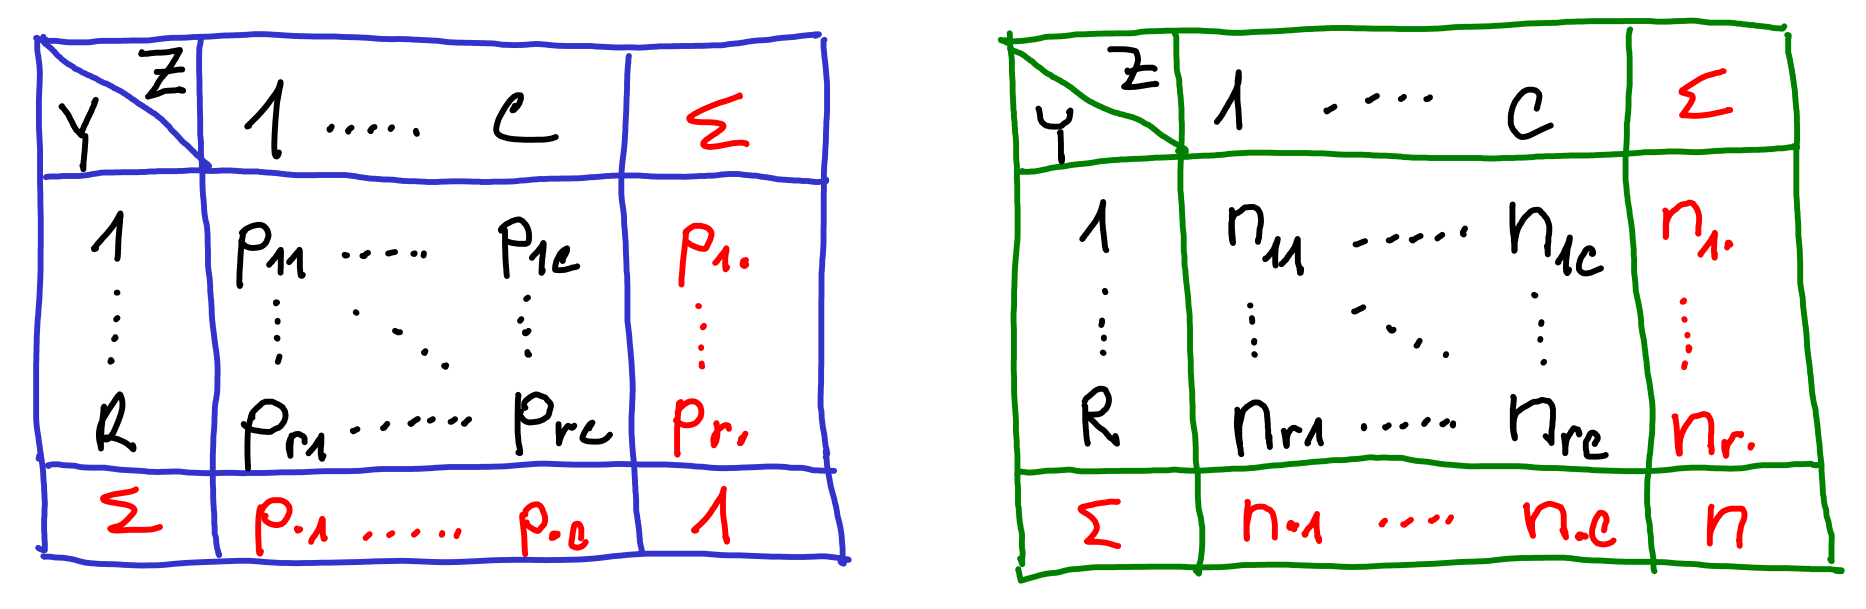

V praxi odpovídá kontingenční tabulka vztahu dvou znaků rozdělených do kategorií. Typickou kontingenční tabulkou je např. matice záměn v klasifikaci. Samozřejme mohou existovat i tabulky vyšších rozměrů. Pokud budeme sledovat vztah mezi znaky `medikace:ano/ne` a `krevní_tlak:změna/bez změny`, je tabulka 2x2. Pokud přidáme `pohlaví: muži/ženy`, pak bude tabulka 2x2x2 (tj. 2 tabulky po 2 znacích).

Statistika používá kontingenční tabulky k analýzám vztahů mezi znaky. Tyto analýzy typicky zahrnují nejen výpočty různých měr (senzitivita, specificita apod.), ale i testování nezávislosti znaků, řádkové homogenity, symetrie apod. Na některé testy se podíváme.

## Pár příkladů

Níže jsou tři příklady kontingenčních tabulek. Zkuste vymyslet, co by na nich šlo zkoumat.

> **Příklad 1: Statická apnoe bez tréninku v závislosti na pohlaví**
>
> | | <1min | (1-2)min | (2-3)min | >3min |
|---|---|---|---|---|
|**Muži** | 80 | 30 | 10 | 2 |
|**Ženy** | 70 | 35 | 12 | 3 |

---

> **Příklad 2: Barva očí syna a otce (Galton)**
>
> | | sv. modrá | modrozelená / šedá | tm. šedá / hnědá | tm. hnědá |
  |---|---|---|---|---|
  |**sv. modrá** | 194 | 70 | 41 | 30 |
  |**modrozelená/šedá** | 83 |124|41|36|
  |**tm. šedá/hnědá** | 25|34|55|23 |
  |**tm. hnědá** | 56 | 36| 43|109|

---

> **Příklad 3: Výsledné hodnocení BI-PST ve třech akad. letech**
>
>| | A | B | C | D | E | F |
|---|---|---|---|---|---|---|
|**B201** |28 |64|62|92|44|52|
|**B211**|15|49|65|71|41|43|
|**B221**|30|56|66|99|41|64|

---

> **Příklad 4: Test účinnosti léku**
>
> | | Zlepšení stavu | Žádné zlepšení |
  |---|---|---|
  | **Testovaný lék** | 54 | 36 |
  | **Placebo** | 47 | 49 |

## Příklad kontingenční tabulky k analýze

Vezměme si výsledná hodnocení předmětu BI-PST ve třech semestrech:

In [2]:
B221 <- c(30, 56, 66, 99, 41, 64)
B211 <- c(15, 49, 65, 71, 41, 43)
B201 <- c(28, 64, 62, 92, 44, 52)
pst <- rbind(B201, B211, B221)
colnames(pst) = LETTERS[1:6]

pst_ct <- as.table(pst)
addmargins(pst_ct)

A  B   C   D   E   F   Sum
B201 28  64  62  92  44  52 342
B211 15  49  65  71  41  43 284
B221 30  56  66  99  41  64 356
Sum  73 169 193 262 126 159 982

Tabulku pravděpodobností pomocí R dostaneme následovně:

In [3]:
probs <- prop.table(pst_ct)
addmargins(probs)

A          B          C          D          E          F         
B201 0.02851324 0.06517312 0.06313646 0.09368635 0.04480652 0.05295316
B211 0.01527495 0.04989817 0.06619145 0.07230143 0.04175153 0.04378819
B221 0.03054990 0.05702648 0.06720978 0.10081466 0.04175153 0.06517312
Sum  0.07433809 0.17209776 0.19653768 0.26680244 0.12830957 0.16191446
     Sum      
B201 0.3482688
B211 0.2892057
B221 0.3625255
Sum  1.0000000

**Mosaic plot** vizuálně napoví, jak je to s proporcemi jednotlivých známek:

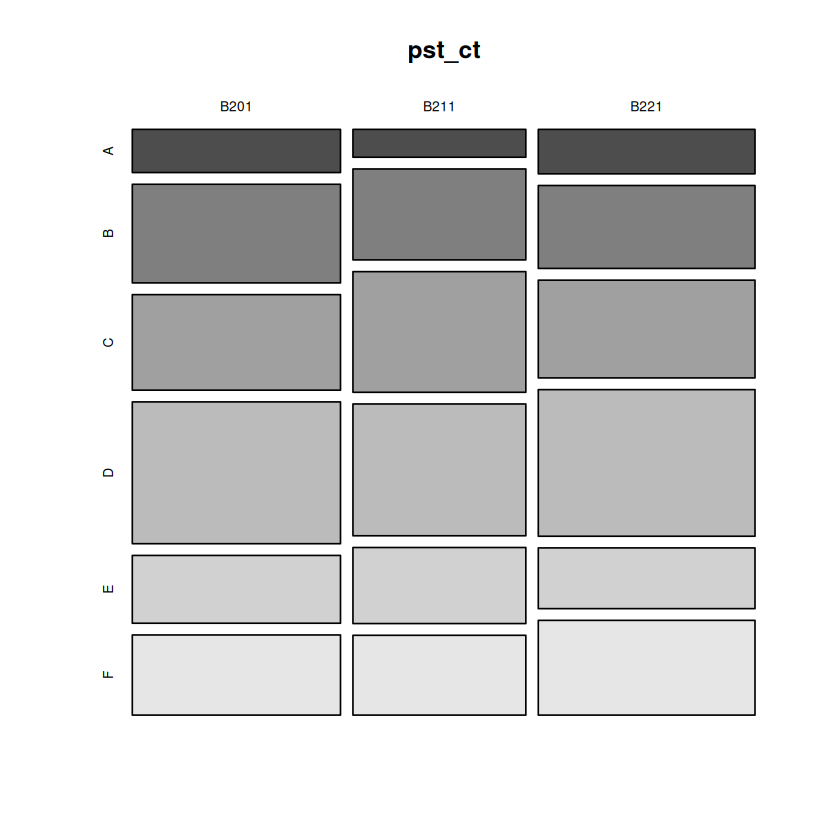

In [4]:
mosaicplot(pst_ct, color=T)           

### [Pearsonův $\chi^2$ test nezávislosti](https://en.wikipedia.org/wiki/Chi-squared_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/chisq.test)

- $H_0$: $p_{ij} = p_{i\cdot} p_{\cdot j}, \qquad i=1,\ldots,r; j=1,\ldots, c$
- $H_A$: neplatí $H_0$

Pearsonův $\chi^2$ test nezávislosti testuje, zda pro všechny dvojice $(i,j)$ platí $p_{ij} = p_{i\cdot} p_{\cdot j}$. Vypočtená testová statistika má $\chi^2$ rozdělení, k čemuž je ovšem potřeba, aby platilo, že pro všechna $(i,j)$ jsou teoretické četnosti $\frac{n_{i\cdot} n_{\cdot j}}{n}\geq 5$. Pokud podmínka není splněna, je lepší použít Fisherův faktoriálový test - viz níže.

Testová statistika má podobu

$$
\chi^2 = n \sum_{i=1}^r \sum_{j=1}^c \frac{n_{ij}^2}{n_{i\cdot} n_{\cdot j}} -n.
$$

Pokud $\chi^2 \geq \chi_{(r-1)(c-1)}^2(\alpha)$, nulová hypotéza se zamítne.

### Test homogenity multinomických rozdělení

- $H_0$: řádkové pravděpodobnosti $p_{i1}, \ldots, p_{i\cdot}$ nezávisí na $i$
- $H_A$: neplatí $H_0$

Tento test vychází z myšlenky, že každý řádek $i\in\{1,\ldots, r\}$ má multinomické rozdělení

$$
\mathrm{Multi}(n_{i\cdot}, p_{i1},\ldots,p_{ic}).
$$

Nulová hypotéza říká, že pravděpodobnosti $p_{i1},\ldots,p_{ic}$ **nezávisí** na řádkovém indexu, neboli že každý řádek je realizací téhož rozdělení. Tento test se provádí stejně, jako Pearsonův $\chi^2$ test nezávislosti výše.

In [5]:
out <- chisq.test(pst_ct)
out


	Pearson's Chi-squared test

data:  pst_ct
X-squared = 8.1734, df = 10, p-value = 0.6119


<br />
Můžeme i snadno spočítat, jaké při nezávislosti byly očekávané četnosti. Pozorované četnosti jsou

In [6]:
addmargins(out$observed)

A  B   C   D   E   F   Sum
B201 28  64  62  92  44  52 342
B211 15  49  65  71  41  43 284
B221 30  56  66  99  41  64 356
Sum  73 169 193 262 126 159 982

Očekávané nám R spočítalo následovně:

In [7]:
addmargins(out$expected)

A        B         C         D         E         F         Sum
B201 25.42363  58.85743  67.21589  91.24644  43.88187  55.37475 342
B211 21.11202  48.87576  55.81670  75.77189  36.43992  45.98371 284
B221 26.46436  61.26680  69.96741  94.98167  45.67821  57.64155 356
Sum  73.00000 169.00000 193.00000 262.00000 126.00000 159.00000 982

Velmi jednoduše řečeno, pokud by byly znaky nezávislé, pak pravděpodobnosti $p_{\cdot j}$ odpovídaly pravděpodobnostem jednotlivých známek a to nezávisle na semestru. Muselo by tedy rovněž platit, že pro semestr $i$ a známku $j$ je $n_{ij} = p_{\cdot j} n_{i \cdot}$ (srov. podmínku pro použitelnost testu!). Například pro $n_{11} = n_{\text{B201 A}}$:

In [8]:
73/982 * 342

[1] 25.42363

Důležité je, že všechny očekávané četnosti, tedy odhady teoretických četností, jsou $\geq 5$, jak bylo požadováno.

### [Fisherův faktoriálový (též exaktní) test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/fisher.test)

- $H_0$: $p_{ij} = p_{i\cdot} p_{\cdot j}, \qquad i=1,\ldots,r; j=1,\ldots, c$
- $H_A$: neplatí $H_0$

Tento test používáme, pokud četnosti v tabulce příliš malé. Původně byl navržen pro čtyřpolní (2x2) tabulky, nicméně lze jej použít i pro tabulky větší. To má určitá omezení, viz nápověda.

Fisherův faktoriálový test je zatížen jistými [kontroverzemi](https://en.wikipedia.org/wiki/Fisher%27s_exact_test#Controversies), mimo jiné tím, že jeho hladina bývá mnohem nižší, než tolerovaná pravděpodobnost chyby prvního druhu. Pro větší data je rovněž výpočetně náročný. Proto se pro čtyřpolní tabulky často preferuje [Barnardův test](https://en.wikipedia.org/wiki/Barnard%27s_test).

In [9]:
fisher.test(pst_ct, simulate.p.value=T)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  pst_ct
p-value = 0.6107
alternative hypothesis: two.sided


### [McNemarův test symetrie](https://en.wikipedia.org/wiki/McNemar%27s_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/mcnemar.test)

Test pro tabulky 2x2 s hypotézami o symetrii
- $H_0$: $p(12) = p(21)$
- $H_A$: $p(12) \ne p(21)$

Typicky jej používáme pro porovnání výsledků dvou testů na témže vzorku, nebo na zjištění, zda určitý zásah vyvolal změnu. `mcnemar.test()` v R obsahuje i Bowkerovo rozšíření na větší než čtyřpolní tabulky.

Uvažujme situační studii 100 dětí ve věku 14 let. Sledujeme, zda uběhnou 1500m v čase do 6 minut. Měření provádíme nejprve bez předchozí přípravy a následně po sedmidenním tréninku. Výsledkem shrnuje následující kontingenční tabulka:

In [10]:
mat <- rbind(c(32, 5), 
             c(15, 48))
colnames(mat) = c("< 6min (training)", ">= 6min (training)")
rownames(mat) = c("< 6min (w/o train.)", ">= 6min (w/o train.)")

ct <- as.table(mat)
addmargins(ct)

< 6min (training) >= 6min (training) Sum
< 6min (w/o train.)  32                 5                  37
>= 6min (w/o train.) 15                48                  63
Sum                  47                53                 100

Z tabulky je patrné, že určitá část dětí si výkonnost udržela, několik dětí se přesunulo do kategorie pod 6 minut a pár dětí naopak, např. v důsledku tréninkové únavy či excesivního výsledku v prvním měření. Cílem je zjistit, zda se trénink způsobil statisticky významný rozdíl:

In [11]:
mcnemar.test(ct)


	McNemar's Chi-squared test with continuity correction

data:  ct
McNemar's chi-squared = 4.05, df = 1, p-value = 0.04417


## [Cramérovo V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) [[R link]](https://www.rdocumentation.org/packages/DescTools/versions/0.99.48/topics/Association%20measures)

Cramérovo V je populární koeficient udávající míru asociace mezi dvěma veličinami. Nabývá hodnot mezi 0 (žádná asociace) a 1 (plná asociace). Je-li $\chi^2$ hodnota Pearsonovy statistiky (viz výše), potom se koeficient spočte

$$
V = \frac{\sqrt{\chi^2/n}}{\min(c-1, r-1)}.
$$

Prozkoumat hodnoty V pomůže kód níže. S rostoucími mimodiagonálními hodnotami začne Cramérovo V klesat.

In [12]:
library(DescTools)
ctab <- rbind(c(50, 0), 
              c(0, 50))
ctab <- as.table(ctab)
colnames(ctab) <- c("Zlepšení", "Žádné zlepšení")
rownames(ctab) <- c("Medikace", "Placebo")
ctab
cat('\n', 'CramerV:', CramerV(ctab))

         Zlepšení Žádné zlepšení
Medikace       50              0
Placebo         0             50


 CramerV: 1

Podobných koeficientů existuje celá řada, např. [Kendallovo $\tau$](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), [Goodman-Kruskalovo $\gamma$](https://en.wikipedia.org/wiki/Goodman_and_Kruskal%27s_gamma) apod.